# ML Implementation

#### References:
- https://xgboost.readthedocs.io/en/stable/
- https://lightgbm.readthedocs.io/en/latest/
- https://catboost.ai/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- https://www.projectpro.io/recipes/find-optimal-parameters-for-catboost-using-gridsearchcv-for-classification
- https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/
- https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

In [5]:
# import libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as ltb
import xgboost as xgb
import catboost as catb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [6]:
# import dataset
df = pd.read_csv("./cleaned_data/mental_health_data_2016-2021_ready_for_ML.csv")
pd.set_option('display.max_columns', 125)
df.head(3)

,Unnamed: 0.1,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,discussing_mental_health_with_coworkers,sought_mental_treatment,discussing_mental_health_with_supervisor,mental_illness_medical_coverage,age_range,sex_0,sex_1,sex_2,working_country_0,working_country_1,working_country_2,working_country_3,working_country_4,working_country_5,working_country_6,working_country_7,working_country_8,working_country_9,working_country_10,working_country_11,working_country_12,working_country_13,living_country_0,living_country_1,living_country_2,living_country_3,living_country_4,living_country_5,living_country_6,living_country_7,living_country_8,living_country_9,living_country_10,living_country_11,living_country_12,living_country_13,mental_illness_family_history_0,mental_illness_family_history_1,mental_illness_family_history_2,mental_disorder_in_the_past_0,mental_disorder_in_the_past_1,mental_disorder_in_the_past_2,mental_disorder_in_the_past_3,mental_disorder_in_the_past_4,mental_health_benefits_from_previous_employers_0,mental_health_benefits_from_previous_employers_1,mental_health_benefits_from_previous_employers_2,mental_health_benefits_from_previous_employers_3,mental_health_benefits_from_previous_employers_4,mental_illness_diagnosis_0,mental_illness_diagnosis_1,mental_illness_diagnosis_2,mental_health_benefits_from_current_employer_0,mental_health_benefits_from_current_employer_1,mental_health_benefits_from_current_employer_2,mental_health_benefits_from_current_employer_3,mental_health_benefits_from_current_employer_4,discussing_mental_health_with_coworkers_0,discussing_mental_health_with_coworkers_1,discussing_mental_health_with_coworkers_2,discussing_mental_health_with_coworkers_3,discussing_mental_health_with_supervisor_0,discussing_mental_health_with_supervisor_1,discussing_mental_health_with_supervisor_2,discussing_mental_health_with_supervisor_3
0,0,0,22,1,0,13,13,1,0,4,2,2,2,3,0,0,3,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,10,1,0,6,6,2,1,4,0,4,2,2,0,1,3,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,21,1,0,13,13,1,0,1,0,2,1,2,0,1,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# drop unnamed columns
df = df.drop('Unnamed: 0', 1)
df = df.drop('Unnamed: 0.1', 1)
df = df.drop('age', 1)
df = df.drop('sex', 1)
df = df.drop('working_country', 1)
df = df.drop('living_country', 1)
df = df.drop('mental_illness_family_history', 1)
df = df.drop('mental_disorder_in_the_past', 1)
df = df.drop('mental_health_benefits_from_previous_employers', 1)
df = df.drop('mental_illness_diagnosis', 1)
df = df.drop('mental_health_benefits_from_current_employer', 1)
df = df.drop('discussing_mental_health_with_coworkers', 1)
df = df.drop('discussing_mental_health_with_supervisor', 1)

# Check all values of y
#df['Have_mental_illness'].value_counts()

<ipython-input-7-d3d23252aa39>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)
<ipython-input-7-d3d23252aa39>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0.1', 1)
<ipython-input-7-d3d23252aa39>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('age', 1)
<ipython-input-7-d3d23252aa39>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('sex', 1)
<ipython-input-7-d3d23252aa39>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('working_country', 1)
<ipython-input-7-

In [46]:
df.to_csv("./cleaned_data/mental_health_data_2016-2021_ready_for_dashboard.csv")
df

,self-employed,have_mental_illness,number_of_employees_your_company_has,sought_mental_treatment,mental_illness_medical_coverage,age_range,sex_0,sex_1,sex_2,working_country_0,working_country_1,working_country_2,working_country_3,working_country_4,working_country_5,working_country_6,working_country_7,working_country_8,working_country_9,working_country_10,working_country_11,working_country_12,working_country_13,living_country_0,living_country_1,living_country_2,living_country_3,living_country_4,living_country_5,living_country_6,living_country_7,living_country_8,living_country_9,living_country_10,living_country_11,living_country_12,living_country_13,mental_illness_family_history_0,mental_illness_family_history_1,mental_illness_family_history_2,mental_disorder_in_the_past_0,mental_disorder_in_the_past_1,mental_disorder_in_the_past_2,mental_disorder_in_the_past_3,mental_disorder_in_the_past_4,mental_health_benefits_from_previous_employers_0,mental_health_benefits_from_previous_employers_1,mental_health_benefits_from_previous_employers_2,mental_health_benefits_from_previous_employers_3,mental_health_benefits_from_previous_employers_4,mental_illness_diagnosis_0,mental_illness_diagnosis_1,mental_illness_diagnosis_2,mental_health_benefits_from_current_employer_0,mental_health_benefits_from_current_employer_1,mental_health_benefits_from_current_employer_2,mental_health_benefits_from_current_employer_3,mental_health_benefits_from_current_employer_4,discussing_mental_health_with_coworkers_0,discussing_mental_health_with_coworkers_1,discussing_mental_health_with_coworkers_2,discussing_mental_health_with_coworkers_3,discussing_mental_health_with_supervisor_0,discussing_mental_health_with_supervisor_1,discussing_mental_health_with_supervisor_2,discussing_mental_health_with_supervisor_3
0,0,0,2,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,5,1,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,0,1,1,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1755,0,0,1,0,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1756,1,0,5,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

### LightGBM default

In [9]:
# Create train and test datasets
y=df["have_mental_illness"]
X=df.drop("have_mental_illness", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
model_lgbm = ltb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
expected_y_lgbm  = y_test
predicted_y_lgbm = model_lgbm.predict(X_test)

In [11]:
print(metrics.classification_report(expected_y_lgbm, predicted_y_lgbm))
print(metrics.confusion_matrix(expected_y_lgbm, predicted_y_lgbm))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       159
           1       0.80      0.85      0.83       193

    accuracy                           0.80       352
   macro avg       0.80      0.80      0.80       352
weighted avg       0.80      0.80      0.80       352

[[117  42]
 [ 28 165]]


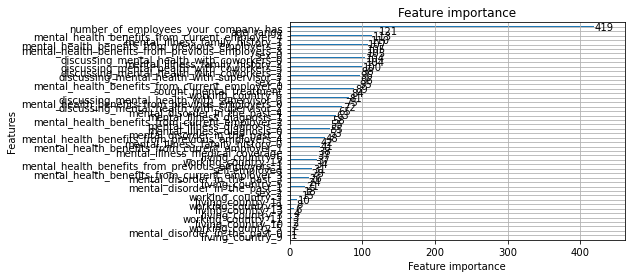

<Figure size 1152x864 with 0 Axes>

In [12]:
# Feature importance plot
ltb.plot_importance(model_lgbm)
plt.figure(figsize = (16, 12))
plt.show()

### XGBoost default

In [13]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
expected_y_xgb  = y_test
predicted_y_xgb = model_xgb.predict(X_test)

In [14]:
print(metrics.classification_report(expected_y_xgb, predicted_y_xgb))
print(metrics.confusion_matrix(expected_y_xgb, predicted_y_xgb))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       159
           1       0.80      0.83      0.81       193

    accuracy                           0.79       352
   macro avg       0.79      0.79      0.79       352
weighted avg       0.79      0.79      0.79       352

[[118  41]
 [ 33 160]]


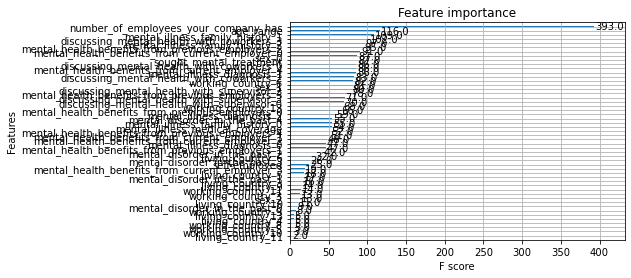

<Figure size 1152x864 with 0 Axes>

In [15]:
# Feature importance plot
xgb.plot_importance(model_xgb)
plt.figure(figsize = (16, 12))
plt.show()

### CatBoost default

In [16]:
model_catb = catb.CatBoostClassifier()
model_catb.fit(X_train, y_train)
expected_y_catb  = y_test
predicted_y_catb = model_catb.predict(X_test)

Learning rate set to 0.011919
0:	learn: 0.6854365	total: 66.6ms	remaining: 1m 6s
1:	learn: 0.6779998	total: 69.3ms	remaining: 34.6s
2:	learn: 0.6709465	total: 71.5ms	remaining: 23.8s
3:	learn: 0.6642277	total: 73.9ms	remaining: 18.4s
4:	learn: 0.6569253	total: 76.4ms	remaining: 15.2s
5:	learn: 0.6499158	total: 79.1ms	remaining: 13.1s
6:	learn: 0.6438780	total: 80.5ms	remaining: 11.4s
7:	learn: 0.6376418	total: 82.8ms	remaining: 10.3s
8:	learn: 0.6318296	total: 85ms	remaining: 9.36s
9:	learn: 0.6260232	total: 87.3ms	remaining: 8.64s
10:	learn: 0.6205290	total: 89.7ms	remaining: 8.07s
11:	learn: 0.6151843	total: 91.3ms	remaining: 7.51s
12:	learn: 0.6097274	total: 93.2ms	remaining: 7.08s
13:	learn: 0.6040061	total: 95.1ms	remaining: 6.7s
14:	learn: 0.5988572	total: 97ms	remaining: 6.37s
15:	learn: 0.5938914	total: 99.2ms	remaining: 6.1s
16:	learn: 0.5890584	total: 101ms	remaining: 5.83s
17:	learn: 0.5840797	total: 103ms	remaining: 5.6s
18:	learn: 0.5793111	total: 104ms	remaining: 5.38s
19

In [17]:
print(metrics.classification_report(expected_y_catb, predicted_y_catb))
print(metrics.confusion_matrix(expected_y_catb, predicted_y_catb))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       159
           1       0.80      0.90      0.85       193

    accuracy                           0.82       352
   macro avg       0.83      0.81      0.82       352
weighted avg       0.82      0.82      0.82       352

[[116  43]
 [ 20 173]]



# ----------------------------------------------------------------

## Parameter tuning

In [18]:
# Parameters used 

parameters = {'depth'         : [4, 5, 6, 7, 8, 9, 10],
              'learning_rate' : [0.1, 0.05, 0.01, 0.02, 0.03, 0.04],
              'iterations'    : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

### CatBoost tuned

In [19]:
grid_search_catb = GridSearchCV(estimator=model_catb, param_grid = parameters, cv = 5, n_jobs=-1)
grid_search_catb.fit(X_train, y_train)

print(" ---Grid Search Results---" )
print("\n The best estimator: \n",grid_search_catb.best_estimator_)
print("\n The best score: \n",grid_search_catb.best_score_)
print("\n The best parameters:\n",grid_search_catb.best_params_)

0:	learn: 0.6278669	total: 9.95ms	remaining: 289ms
1:	learn: 0.5816130	total: 12.1ms	remaining: 170ms
2:	learn: 0.5452364	total: 17.3ms	remaining: 155ms
3:	learn: 0.5131444	total: 26.2ms	remaining: 170ms
4:	learn: 0.4839792	total: 35.7ms	remaining: 179ms
5:	learn: 0.4670743	total: 36.6ms	remaining: 146ms
6:	learn: 0.4460662	total: 47.4ms	remaining: 156ms
7:	learn: 0.4272824	total: 58.8ms	remaining: 162ms
8:	learn: 0.4083509	total: 69.8ms	remaining: 163ms
9:	learn: 0.3933921	total: 79.1ms	remaining: 158ms
10:	learn: 0.3808279	total: 88.2ms	remaining: 152ms
11:	learn: 0.3684638	total: 97.7ms	remaining: 147ms
12:	learn: 0.3568744	total: 107ms	remaining: 139ms
13:	learn: 0.3506088	total: 116ms	remaining: 132ms
14:	learn: 0.3388394	total: 125ms	remaining: 125ms
15:	learn: 0.3357915	total: 128ms	remaining: 112ms
16:	learn: 0.3271490	total: 138ms	remaining: 105ms
17:	learn: 0.3184836	total: 149ms	remaining: 99.2ms
18:	learn: 0.3114122	total: 158ms	remaining: 91.5ms
19:	learn: 0.3023716	total:

In [41]:
model_catb_tuned = catb.CatBoostClassifier(
    depth=10, iterations=30, learning_rate=0.1
)
model_catb_tuned.fit(X_train, y_train)
expected_y_catb_tuned  = y_test
predicted_y_catb_tuned = model_catb_tuned.predict(X_test)

0:	learn: 0.6278669	total: 17.2ms	remaining: 500ms
1:	learn: 0.5816130	total: 20.7ms	remaining: 289ms
2:	learn: 0.5452364	total: 28.7ms	remaining: 258ms
3:	learn: 0.5131444	total: 41.9ms	remaining: 272ms
4:	learn: 0.4839792	total: 54.3ms	remaining: 271ms
5:	learn: 0.4670743	total: 55.4ms	remaining: 221ms
6:	learn: 0.4460662	total: 66.2ms	remaining: 218ms
7:	learn: 0.4272824	total: 76.2ms	remaining: 210ms
8:	learn: 0.4083509	total: 85.5ms	remaining: 199ms
9:	learn: 0.3933921	total: 94.4ms	remaining: 189ms
10:	learn: 0.3808279	total: 104ms	remaining: 179ms
11:	learn: 0.3684638	total: 112ms	remaining: 169ms
12:	learn: 0.3568744	total: 121ms	remaining: 159ms
13:	learn: 0.3506088	total: 130ms	remaining: 149ms
14:	learn: 0.3388394	total: 139ms	remaining: 139ms
15:	learn: 0.3357915	total: 142ms	remaining: 125ms
16:	learn: 0.3271490	total: 151ms	remaining: 116ms
17:	learn: 0.3184836	total: 160ms	remaining: 107ms
18:	learn: 0.3114122	total: 169ms	remaining: 98ms
19:	learn: 0.3023716	total: 178m

In [42]:
print(metrics.classification_report(expected_y_catb_tuned, predicted_y_catb_tuned))
print(metrics.confusion_matrix(expected_y_catb_tuned, predicted_y_catb_tuned))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       159
           1       0.80      0.92      0.86       193

    accuracy                           0.83       352
   macro avg       0.84      0.82      0.83       352
weighted avg       0.84      0.83      0.83       352

[[116  43]
 [ 16 177]]


### XGBoost tuned

In [43]:
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid = parameters, cv = 5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print(" ---Grid Search Results---" )
print("\n The best estimator: \n",grid_search_xgb.best_estimator_)
print("\n The best score: \n",grid_search_xgb.best_score_)
print("\n The best parameters:\n",grid_search_xgb.best_params_)

[13:41:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


 ---Grid Search Results---

 The best estimator: 
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              depth=4, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', iterations=10,
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_l

In [44]:
model_xgb_tuned = xgb.XGBClassifier(
    depth=4, iterations=10, learning_rate=0.02
)
model_xgb_tuned.fit(X_train, y_train)
expected_y_xgb_tuned  = y_test
predicted_y_xgb_tuned = model_xgb_tuned.predict(X_test)

[13:41:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [45]:
print(metrics.classification_report(expected_y_xgb_tuned, predicted_y_xgb_tuned))
print(metrics.confusion_matrix(expected_y_xgb_tuned, predicted_y_xgb_tuned))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79       159
           1       0.80      0.91      0.85       193

    accuracy                           0.82       352
   macro avg       0.83      0.82      0.82       352
weighted avg       0.83      0.82      0.82       352

[[115  44]
 [ 18 175]]


### LightGBM tuned

In [26]:
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid = parameters, cv = 5, n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

print(" ---Grid Search Results---" )
print("\n The best estimator: \n",grid_search_lgbm.best_estimator_)
print("\n The best score: \n",grid_search_lgbm.best_score_)
print("\n The best parameters:\n",grid_search_lgbm.best_params_)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
 ---Grid Search Results---

 The best estimator: 
 LGBMClassifier(depth=4, iterations=10, learning_rate=0.01)

 The best score: 
 0.8415082910577724

 The best parameters:
 {'depth': 4, 'iterations': 10, 'learning_rate': 0.01}


In [27]:
model_lgbm_tuned = ltb.LGBMClassifier(
         depth=4, iterations=10, learning_rate=0.01
)
model_lgbm_tuned.fit(X_train, y_train)
expected_y_lgbm_tuned = y_test
predicted_y_lgbm_tuned = model_lgbm_tuned.predict(X_test)

In [28]:
print(metrics.classification_report(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))
print(metrics.confusion_matrix(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       159
           1       0.80      0.91      0.85       193

    accuracy                           0.83       352
   macro avg       0.84      0.82      0.82       352
weighted avg       0.83      0.83      0.83       352

[[116  43]
 [ 17 176]]


# -----------------------------------------------------------------------------

## K-fold cross-validation with tuned models

In [29]:
# classification report
original_data = []
predicted_data = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data.extend(y_true)
    predicted_data.extend(y_predicted)
    return accuracy_score(y_true, y_predicted) # return accuracy score

### LightGBM tuned with 5-fold Cross-validation

In [30]:
from sklearn.model_selection import cross_val_score
model_lgbm_5fold = ltb.LGBMClassifier(depth=4, iterations=10, learning_rate=0.01)
model_lgbm_5fold.fit(X_train, y_train)
model_lgbm_5fold.score(X_test, y_test)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations


0.8295454545454546

In [31]:
# classification report
original_data_lgbm = []
predicted_data_lgbm = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data_lgbm.extend(y_true)
    predicted_data_lgbm.extend(y_predicted)
    return accuracy_score(y_true, y_predicted)

# Parameter tuning with cross validation
lgbm_tuned_score = cross_val_score(ltb.LGBMClassifier(depth=4, iterations=10, learning_rate=0.01), X=X, y=y, cv=5, scoring=make_scorer(classification_report_all_scores))
print(classification_report(original_data_lgbm, predicted_data_lgbm))
print(metrics.confusion_matrix(original_data_lgbm, predicted_data_lgbm))

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       805
           1       0.81      0.92      0.86       954

    accuracy                           0.84      1759
   macro avg       0.85      0.83      0.84      1759
weighted avg       0.85      0.84      0.84      1759

[[600 205]
 [ 75 879]]


### XGBoost tuned with 5-fold Cross-validation

In [32]:
model_xgb_5fold = xgb.XGBClassifier(depth=4, iterations=10, learning_rate=0.02)
model_xgb_5fold.fit(X_train, y_train)
model_xgb_5fold.score(X_test, y_test)

[13:32:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.8238636363636364

In [34]:
# classification report
original_data_xgb = []
predicted_data_xgb = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data_xgb.extend(y_true)
    predicted_data_xgb.extend(y_predicted)
    return accuracy_score(y_true, y_predicted)

# Parameter tuning with cross validation
xgb_tuned_score = cross_val_score(xgb.XGBClassifier(depth=4, iterations=10, learning_rate=0.02), X=X, y=y, cv=5, scoring=make_scorer(classification_report_all_scores))
print(classification_report(original_data_xgb, predicted_data_xgb))
print(metrics.confusion_matrix(original_data_xgb, predicted_data_xgb))

[13:33:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:33:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:33:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.m

### CatBoost tuned with 5-fold Cross-validation

In [35]:
model_catb_5fold = catb.CatBoostClassifier(depth=10, iterations=30, learning_rate=0.1)
model_catb_5fold.fit(X_train, y_train)
model_catb_5fold.score(X_test, y_test)

0:	learn: 0.6278669	total: 16.3ms	remaining: 472ms
1:	learn: 0.5816130	total: 19.4ms	remaining: 271ms
2:	learn: 0.5452364	total: 26.6ms	remaining: 239ms
3:	learn: 0.5131444	total: 39.4ms	remaining: 256ms
4:	learn: 0.4839792	total: 51.4ms	remaining: 257ms
5:	learn: 0.4670743	total: 52.4ms	remaining: 210ms
6:	learn: 0.4460662	total: 63ms	remaining: 207ms
7:	learn: 0.4272824	total: 73.6ms	remaining: 202ms
8:	learn: 0.4083509	total: 83ms	remaining: 194ms
9:	learn: 0.3933921	total: 92ms	remaining: 184ms
10:	learn: 0.3808279	total: 101ms	remaining: 175ms
11:	learn: 0.3684638	total: 111ms	remaining: 166ms
12:	learn: 0.3568744	total: 120ms	remaining: 156ms
13:	learn: 0.3506088	total: 129ms	remaining: 147ms
14:	learn: 0.3388394	total: 138ms	remaining: 138ms
15:	learn: 0.3357915	total: 141ms	remaining: 123ms
16:	learn: 0.3271490	total: 150ms	remaining: 114ms
17:	learn: 0.3184836	total: 158ms	remaining: 106ms
18:	learn: 0.3114122	total: 168ms	remaining: 97.1ms
19:	learn: 0.3023716	total: 177ms	re

0.8323863636363636

In [38]:
# classification report
original_data_catb = []
predicted_data_catb = []

#Make our customer score
def classification_report_all_scores(y_true, y_predicted):
    original_data_catb.extend(y_true)
    predicted_data_catb.extend(y_predicted)
    return accuracy_score(y_true, y_predicted)

# Parameter tuning with cross validation
catb_tuned_score = cross_val_score(catb.CatBoostClassifier(depth=10, iterations=30, learning_rate=0.1), X=X, y=y, cv=5, scoring=make_scorer(classification_report_all_scores))
print(classification_report(original_data_catb, predicted_data_catb)) 
print(metrics.confusion_matrix(original_data_catb, predicted_data_catb))

0:	learn: 0.6266372	total: 14.9ms	remaining: 432ms
1:	learn: 0.5810864	total: 17.6ms	remaining: 246ms
2:	learn: 0.5441902	total: 24.5ms	remaining: 221ms
3:	learn: 0.5114829	total: 38.2ms	remaining: 248ms
4:	learn: 0.4822164	total: 49.7ms	remaining: 249ms
5:	learn: 0.4657413	total: 50.8ms	remaining: 203ms
6:	learn: 0.4437006	total: 61ms	remaining: 201ms
7:	learn: 0.4238018	total: 70.6ms	remaining: 194ms
8:	learn: 0.4063031	total: 80ms	remaining: 187ms
9:	learn: 0.3923132	total: 89.3ms	remaining: 179ms
10:	learn: 0.3792816	total: 98.6ms	remaining: 170ms
11:	learn: 0.3659246	total: 107ms	remaining: 161ms
12:	learn: 0.3548621	total: 116ms	remaining: 152ms
13:	learn: 0.3472839	total: 125ms	remaining: 143ms
14:	learn: 0.3371590	total: 134ms	remaining: 134ms
15:	learn: 0.3291396	total: 143ms	remaining: 125ms
16:	learn: 0.3197201	total: 152ms	remaining: 116ms
17:	learn: 0.3127817	total: 161ms	remaining: 107ms
18:	learn: 0.3080520	total: 169ms	remaining: 98.1ms
19:	learn: 0.3014909	total: 178ms